#  Student Information

     

### Wilfer Alexander Echavarria Vargas
## Student Numer:
    852538228     
## Date:
    2022-05-02


El abalón es un tipo de caracol consumible cuyo precio varía en función de su edad y como se menciona aquí:

El objetivo es predecir la edad del abalón a partir de mediciones físicas.
La edad del abalón se determina tradicionalmente cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscopio, una tarea aburrida y que lleva mucho tiempo.

aburrida y lenta. Para predecir la edad se utilizan otras mediciones, más fáciles de obtener.

**DESCRIPCIÓN DEL PROYECTO**

Predicción de la edad del abalón a partir de mediciones físicas. La edad del abalón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscopio.

**ATRIBUTOS FÍSICOS**

    SEXO: macho/hembra/infante

*   LONGITUD: Medida más larga de la concha
*   DIÁMETRO: Diámetro del abalón
*   ALTURA: Altura del abalón
*   PESO ENTERO: Peso del abalón entero
*   PESO SHUCKED: Peso de la carne
*   PESO VISCERA: Peso de las vísceras - órganos internos
*   PESO CONCHA: Peso de la concha después del secado
*   ANILLOS: El número de anillos +1,5 da la edad del abalón

In [7]:
#We import the necessary libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.subplots as sp
from IPython.display import display
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
from wordcloud import STOPWORDS as stopwords_wc
from wordcloud import WordCloud, ImageColorGenerator
rcParams['figure.figsize'] = 14, 8.7
LABELS = ["Normal","Fraud"]
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

 ## a. ¿Cuántas características tiene el conjunto de datos? ¿Hay una variable objetivo? Explique y muestre el código
  
  El conjunto de datos Abalón está compuesto por los siguientes atributos:
 1.  Sexo: Es el sexo del abalón y tiene valor categórico (M, F o I).
 2. Longitud : Es la medida más larga de la concha del abalón en mm. Valor numérico continuo.
 3. Diámetro : Medida de la concha del abalón perpendicular a la longitud en mm. Valor numérico continuo.
 4. Altura : Altura de la concha en mm. Valor numérico continuo.
 5. Peso entero : Peso del abalón en gramos. Valor numérico continuo.
 6. Peso pelado : Peso en gramos de la carne del abalón. Valor numérico continuo.
 7. Peso de las vísceras : Peso del abalón después del sangrado en gramos. Valor numérico continuo.
 8. Peso de la concha : Peso del abalón después del secado en gramos. Valor numérico continuo.
 9. Anillos : Este es el objetivo, es decir, la característica que vamos a entrenar al modelo para predecir. Como se ha mencionado anteriormente, estamos interesados en la edad del abalón y se ha establecido que el número de anillos + 1,5 da la edad. Valor numérico discreto.


In [2]:
#libreria para importar informacion de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# Abrimos el archivo utilizando pandas con el atributo read y lo separamos por comas
abalone = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Abalon/abalone.csv', sep=',')

# Mostramos la cantidad de registros en el conjunto de datos
print('Total de registros: %d' % len(abalone))

# La forma del DataFrame muestra el número de filas y columnas
abalone.shape


Total de registros: 4177


(4177, 9)

In [37]:
# Esta línea muestra las primeras cinco filas del conjunto de datos
abalone.head(5)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


   The Target Attribute, is the ring attribute which are between 1 and 29 rings in an abalone

In [38]:
# Definir el número de filas y columnas para la disposición de subgráficas
rows = 2
cols = 2

# Crear una figura con subgráficas
fig = sp.make_subplots(rows=rows, cols=cols,
                       subplot_titles=("Histograma de Rings", "Histograma de Rings (KDE=False)",
                                       "Diagrama de Caja de Rings"),
                       shared_xaxes=True, shared_yaxes=True)

# Agregar histograma de Rings
fig.add_trace(go.Histogram(x=abalone['Rings'],
                           name='Histograma de Rings',
                           xbins=dict(start=0, end=30, size=2),
                           showlegend=False),
              row=1, col=1)

# Agregar histograma de Rings con KDE desactivado
fig.add_trace(go.Histogram(x=abalone['Rings'],
                           name='Histograma de Rings (KDE=False)',
                           xbins=dict(start=0, end=30, size=2),
                           showlegend=False),
              row=1, col=2)

# Agregar diagrama de caja de Rings
fig.add_trace(go.Box(y=abalone['Rings'],
                     name='Diagrama de Caja de Rings',
                     boxmean='sd'),
              row=2, col=1)

# Actualizar el diseño de la figura
fig.update_layout(height=800, width=800,
                  title_text="Análisis de la Columna 'Rings'",
                  showlegend=False)

fig.update_xaxes(range=[0, 30], tickvals=list(range(0, 31, 4)))
fig.update_yaxes(title_text='Frecuencia')

# Mostrar la figura
fig.show()


## b. ¿Cuántas características son numéricas, textuales, categóricas o booleanas? ¿Existe alguna dependencia evidente entre las características? Explíquelo y muestre el código.

In [39]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


tenemos un atributo categórico que es el sexo del abalón, tenemos 8 características numéricas de tipo float y una de tipo integer que son los anillos

In [40]:
# Definir el número de filas y columnas para la disposición de subgráficas
rows = 2
cols = 2

# Crear una figura con subgráficas
fig = sp.make_subplots(rows=rows, cols=cols,
                       subplot_titles=("Cantidad de Abalones por Sexo", "Cantidad de Abalones por Edad"),
                       shared_xaxes=True, shared_yaxes=True)

# Agregar gráfico de barras para la cantidad de abalones por sexo
fig.add_trace(go.Bar(x=abalone['Sex'].value_counts().index,
                     y=abalone['Sex'].value_counts().values,
                     name='Cantidad de Abalones por Sexo'),
              row=1, col=1)

# Agregar gráfico de barras para la cantidad de abalones por número de anillos (edad)
fig.add_trace(go.Bar(x=abalone['Rings'].value_counts().sort_index().index,
                     y=abalone['Rings'].value_counts().sort_index().values,
                     name='Cantidad de Abalones por Edad'),
              row=1, col=2)

# Actualizar el diseño de la figura
fig.update_layout(height=800, width=1000,
                  title_text="Distribución de Abalones por Sexo y Edad",
                  showlegend=False)

fig.update_xaxes(title_text='Categoría', tickvals=list(range(0, 31, 4)))
fig.update_yaxes(title_text='Cantidad')

# Mostrar la figura
fig.show()


sin embargo, la función sexo no es tan útil para el análisis de regresión porque la salida es de tipo objeto. Por lo tanto, sería útil convertirla en funciones booleanas, para un análisis de regresión podríamos utilizar los anillos que son de tipo entero

El método describe() en un DataFrame de pandas proporciona un resumen estadístico de las columnas numéricas. Muestra información como el conteo, la media, la desviación estándar, el mínimo, los percentiles (25%, 50%, 75%) y el máximo de los datos.


**describe():**

 Genera estadísticas descriptivas para las columnas numéricas del DataFrame abalone.

*   count: Número de valores no nulos.
*    mean: Media de los valores.
*    std: Desviación estándar de los valores.
*    min: Valor mínimo.
*    25%: Primer cuartil (25º percentil).
*    50%: Mediana (50º percentil).
*    75%: Tercer cuartil (75º percentil).
*    max: Valor máximo.

In [41]:
# El método describe() devuelve una descripción de los datos en el DataFrame.
abalone.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.07,0.06,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00
75%,0.61,0.48,0.17,1.15,0.50,0.25,0.33,11.00
max,0.81,0.65,1.13,2.83,1.49,0.76,1.00,29.00


In [42]:
# Mostrar el tipo de datos de cada columna
print(abalone.dtypes)


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object


In [43]:
# Seleccionar solo las columnas numéricas
numerical_data = abalone.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Mostrar la matriz de correlación
correlation_matrix

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
Diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
Height,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
Whole weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
Shucked weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
Viscera weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
Shell weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
Rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


En esta sección veremos cómo se relacionan los atributos del conjunto de datos y cómo influyen las variables independientes en la variable objetivo. Podemos verlo mejor con un mapa de calor

---
**Explicación de la Matriz de Correlación**

Una matriz de correlación es una herramienta estadística que muestra la relación lineal entre un conjunto de variables. En el contexto de un DataFrame, cada celda en la matriz muestra la correlación entre dos columnas (variables).


**1. ¿Qué es la Correlación?**

La correlación mide la fuerza y la dirección de una relación lineal entre dos variables. Se expresa con un coeficiente que varía entre -1 y 1:

* 1: Correlación positiva perfecta. Cuando una variable aumenta, la otra también aumenta en la misma proporción.

* -1: Correlación negativa perfecta. Cuando una variable aumenta, la otra disminuye en la misma proporción.

*    0: No hay correlación lineal. Las variables no están linealmente relacionadas.


**2. ¿Cómo se Lee la Matriz de Correlación?**

En una matriz de correlación, cada celda en la fila i y columna j muestra el coeficiente de correlación entre la variable i y la variable j. La matriz es simétrica, lo que significa que el coeficiente de correlación entre i y j es el mismo que entre j y i.

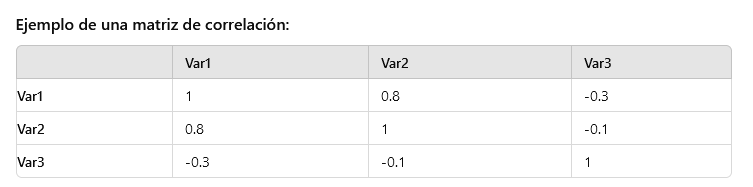

* Var1 y Var2: Correlación de 0.8. Esto indica una fuerte correlación positiva entre Var1 y Var2.
* Var1 y Var3: Correlación de -0.3. Esto indica una correlación negativa débil entre Var1 y Var3.
* Var2 y Var3: Correlación de -0.1. Esto indica una correlación muy débil negativa entre Var2 y Var3.

**3. Interpretación de la Matriz de Correlación**

*    Relación Positiva: Un valor positivo cercano a 1 sugiere que las dos variables tienden a aumentar juntas. Por ejemplo, si Var1 y Var2 tienen una correlación de 0.8, esto indica que cuando Var1 aumenta, Var2 también tiende a aumentar.

*    Relación Negativa: Un valor negativo cercano a -1 sugiere que cuando una variable aumenta, la otra tiende a disminuir. Por ejemplo, si Var1 y Var3 tienen una correlación de -0.3, esto indica que cuando Var1 aumenta, Var3 tiende a disminuir, pero la relación es débil.

*    Sin Relación Lineal: Un valor cercano a 0 indica que no hay una relación lineal significativa entre las dos variables. Las variables pueden tener una relación no lineal o ninguna relación significativa en absoluto.

**4. Uso de la Matriz de Correlación**

*    Identificación de Relaciones: Permite identificar relaciones lineales entre variables, lo cual es útil para el análisis exploratorio de datos y para construir modelos predictivos.

*    Selección de Variables: En la selección de características para modelos predictivos, las variables altamente correlacionadas con la variable objetivo son más útiles.

*    Detección de Multicolinealidad: Ayuda a identificar la multicolinealidad, donde dos o más variables predictoras están altamente correlacionadas entre sí, lo cual puede afectar la interpretación del modelo.

**5. Visualización**

Las visualizaciones como el mapa de calor proporcionan una forma intuitiva de ver la matriz de correlación. Los colores en el mapa de calor representan el valor de la correlación, facilitando la identificación rápida de patrones y relaciones entre variables




In [44]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Asegúrate de que solo las columnas numéricas están presentes
numerical_data = abalone.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr = numerical_data.corr()

# Crear el mapa de calor con Plotly
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.columns),
    annotation_text=corr.round(2).values,
    colorscale='RdBu',
    zmin=-1, zmax=1
)

# Configurar el diseño del gráfico
fig.update_layout(
    title='Matriz de Correlación de Abalones',
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickvals=list(range(len(corr.columns))), ticktext=corr.columns),
    yaxis=dict(tickvals=list(range(len(corr.columns))), ticktext=corr.columns),
    coloraxis_colorbar=dict(title='Correlación')
)

# Mostrar el gráfico
fig.show()


Al analizar la matriz de correlaciones, observamos que el peso y la altura son los datos que más relación tienen con el número de anillos

In [45]:
# Crear el gráfico de dispersión con ajuste de regresión entre 'Rings' y 'Height'
fig1 = px.scatter(abalone, x='Rings', y='Height', trendline='ols',
                  title='Relación entre Rings y Height',
                  labels={'Rings': 'Número de Anillos', 'Height': 'Altura'},
                  color_discrete_sequence=['blue'])

# Crear el gráfico de dispersión con ajuste de regresión entre 'Rings' y 'Shell weight'
fig2 = px.scatter(abalone, x='Rings', y='Shell weight', trendline='ols',
                  title='Relación entre Rings y Shell Weight',
                  labels={'Rings': 'Número de Anillos', 'Shell weight': 'Peso de la Concha'},
                  color_discrete_sequence=['green'])

# Mostrar los gráficos
fig1.show()
fig2.show()


Resultados:

*   Gráfico 1 (Relación entre Rings y Height): Muestra la relación entre el número de anillos y la altura del abulón, con una línea de ajuste de regresión que facilita la comprensión de la relación lineal.

*    Gráfico 2 (Relación entre Rings y Shell weight): Muestra la relación entre el número de anillos y el peso de la concha, con una línea de ajuste de regresión para ilustrar la tendencia.

## c. ¿Se trata de una tarea de minería de datos supervisada o no supervisada? Explique y muestre el código.

Es una tarea de minería de datos supervisada, la tarea principal es predecir la Predicción de la edad del abalón a partir de mediciones físicas

En el conjunto de datos de abalón el objetivo es poder predecir la edad del abalón es predecir la edad del abalón a partir de medidas físicas.
La edad no es un dato que tengamos en nuestro conjunto de datos, que vamos a incorporar con el siguiente valor +1,5 para determinar la edad del abalón

Para calcular la edad vamos a sustituir el atributo anillos por edades y lo vamos a modificar para poder determinar la edad del abalón

In [46]:
# Añadir la columna 'Ages'
abalone['Ages'] = abalone['Rings'] + 1.5

# Eliminar la columna 'Rings'
abalone.drop('Rings', axis=1, inplace=True)

# Mostrar las primeras filas para verificar los cambios
abalone.head()

# Mostrar las columnas del DataFrame para verificar la eliminación de 'Rings'
abalone.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Ages'],
      dtype='object')

**Resultados Esperados:**

*    Nueva Columna Ages: Debería aparecer en el DataFrame con valores calculados.
*    Columna Rings Eliminada: No debería aparecer en el DataFrame después de la eliminación.

In [49]:
# Imprimir las dimensiones del DataFrame (número de filas y columnas)
print(abalone.shape)

# Imprimir los tipos de datos de cada columna
print(abalone.dtypes)


(4177, 9)
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Ages              float64
dtype: object


**Interpretación de Resultados**

*    Dimensiones del DataFrame: Te permite saber cuántas filas y columnas tiene el DataFrame, lo cual es útil para asegurarte de que los cambios se hayan aplicado correctamente.

*    Tipos de Datos de Cada Columna: Te ayuda a verificar que los tipos de datos de cada columna sean los esperados. Por ejemplo, después de añadir la columna Ages, debería ser de tipo float64, y la columna Sex debería seguir siendo de tipo object si no ha sido modificada.

---
Explicación

*    pd.get_dummies():
*       Propósito: Convierte características categóricas en variables dummy (o variables ficticias) binarias.
*        Cómo Funciona: Para cada valor único en una columna categórica, se crea una nueva columna con un valor binario (0 o 1) que indica la presencia o ausencia de ese valor en la fila correspondiente.
**        Ejemplo: Si la columna Sex tiene valores ['M', 'F'], se crearán dos nuevas columnas: Sex_M y Sex_F. Cada fila tendrá un 1 en la columna correspondiente al valor original de Sex y un 0 en la otra.

*    abalone.head():
*        Propósito: Muestra las primeras filas del DataFrame después de la conversión para verificar los cambios realizados.

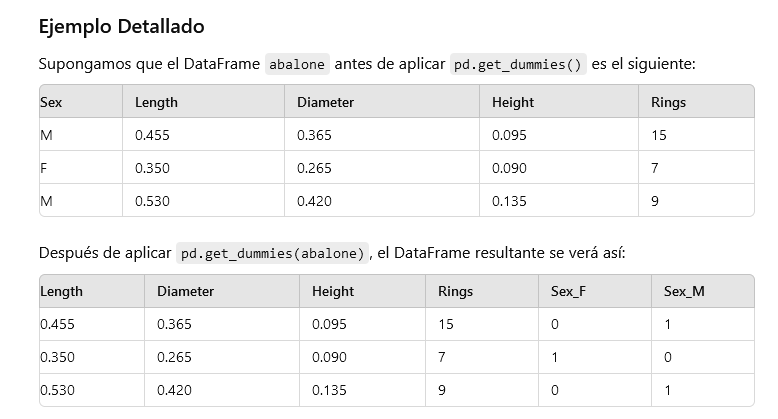

**Sex_F y Sex_M:**

 Columnas dummy para la característica categórica Sex. Indican si el sexo es femenino (Sex_F) o masculino (Sex_M).

 Este proceso facilita la preparación de datos para modelos de aprendizaje automático, ya que la mayoría de los modelos requieren que las características sean numéricas. Al convertir las características categóricas en variables dummy, puedes usar estos datos para entrenar modelos y realizar análisis posteriores.





In [51]:
# Convertir las características categóricas en características numéricas binarias
abalone = pd.get_dummies(abalone)

# Mostrar las primeras filas del DataFrame resultante
print("Primeras filas del DataFrame después de convertir las características categóricas en binarias:")
abalone.head()


Primeras filas del DataFrame después de convertir las características categóricas en binarias:


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages,Sex_F,Sex_I,Sex_M
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,16.50,False,False,True
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,8.50,False,False,True
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,10.50,True,False,False
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,11.50,False,False,True
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,8.50,False,True,False


In [52]:
# Imprimir las dimensiones del DataFrame (número de filas y columnas)
print("Dimensiones del DataFrame (filas, columnas):")
print(abalone.shape)

# Imprimir los tipos de datos de cada columna
print("\nTipos de datos de cada columna:")
print(abalone.dtypes)


Dimensiones del DataFrame (filas, columnas):
(4177, 11)

Tipos de datos de cada columna:
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Ages              float64
Sex_F                bool
Sex_I                bool
Sex_M                bool
dtype: object


Verificación y Validación

Al ejecutar estos comandos, puedes verificar que:

*    El número de columnas ha aumentado debido a la creación de columnas dummy.
*    Los tipos de datos son los esperados: las columnas dummy deberían ser de tipo uint8 (o a veces int64), y las columnas numéricas deberían mantener su tipo original (como float64).

In [55]:
# Obtener un resumen estadístico de las columnas numéricas en el DataFrame
abalone.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,11.43
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.07,0.06,0.00,0.00,0.00,0.00,0.00,2.50
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,9.50
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,10.50
75%,0.61,0.48,0.17,1.15,0.50,0.25,0.33,12.50
max,0.81,0.65,1.13,2.83,1.49,0.76,1.00,30.50


**Interpretación**

*    count: Todos los campos tienen el mismo número de registros, lo que sugiere que no hay valores nulos.
*    mean: La media de cada columna, por ejemplo, el peso promedio de la concha es aproximadamente 0.429.
*    std: La desviación estándar muestra cómo se dispersan los datos alrededor de la media.
*    min y max: Los valores mínimo y máximo en cada columna, por ejemplo, el número mínimo de anillos es 1 y el máximo es 29.
*    25%, 50%, 75%: Los percentiles, que ayudan a entender la distribución de los datos.

Este resumen estadístico te proporciona una visión general rápida de la distribución y características de tus datos

Basándonos en el análisis anterior, podemos seguir validando la correlación con respecto al número de años. Probamos muchos valores y descubrimos que la región delimitada por los años inferiores a 10 tiene una correlación más alta entre los atributos independientes y la variable objetivo.

In [56]:
# Filtrar el DataFrame para obtener solo las filas donde 'Ages' < 10
i_abalone = abalone[abalone['Ages'] < 10]

# Calcular la matriz de correlación del subconjunto filtrado
corr = i_abalone.corr()

# Crear el mapa de calor usando Plotly Express
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    zmin=-1,
    zmax=1,
    title='Matriz de Correlación para Edades < 10'
)

# Mostrar el gráfico
fig.show()



* px.imshow: Crea una visualización de imagen para la matriz de correlación.
* text_auto=True: Muestra los valores numéricos dentro de las celdas del mapa de calor.
* color_continuous_scale='RdBu_r': Define el esquema de colores que varía de rojo a azul, donde el rojo representa correlaciones negativas y el azul representa correlaciones positivas.
* zmin y zmax: Establecen los límites de la escala de colores desde -1 hasta 1.
* title: Añade un título al gráfico.

En el siguiente gráfico observamos la correlación positiva entre los atributos Tamaño y Años: lo que nos muestra este análisis es que cuanto más viejo es el abalón, sus otros atributos crecen igual

In [57]:
import plotly.graph_objects as go
import plotly.subplots as sp

# Crear subplots para colocar múltiples gráficos en un solo layout
fig = sp.make_subplots(
    rows=2, cols=3,
    subplot_titles=('Ages vs Length', 'Ages vs Diameter', 'Ages vs Height',
                    'Ages vs Sex_F', 'Ages vs Sex_I', 'Ages vs Sex_M'),
    horizontal_spacing=0.1, vertical_spacing=0.2
)

# Lista de características a comparar con Ages
features = ['Length', 'Diameter', 'Height', 'Sex_F', 'Sex_I', 'Sex_M']

# Colores y títulos para cada gráfico
titles = ['Ages vs Length', 'Ages vs Diameter', 'Ages vs Height', 'Ages vs Sex_F', 'Ages vs Sex_I', 'Ages vs Sex_M']

# Añadir gráficos de dispersión con líneas de ajuste
for i, feature in enumerate(features):
    row = i // 3 + 1
    col = i % 3 + 1

    # Agregar gráfico de dispersión
    scatter = go.Scatter(
        x=i_abalone['Ages'],
        y=i_abalone[feature],
        mode='markers',
        name=f'Ages vs {feature}',
        marker=dict(size=8, color='blue', opacity=0.7)
    )

    # Agregar línea de ajuste
    line_fit = np.polyfit(i_abalone['Ages'], i_abalone[feature], 1)
    line = go.Scatter(
        x=i_abalone['Ages'],
        y=line_fit[0] * i_abalone['Ages'] + line_fit[1],
        mode='lines',
        name=f'Fit line for {feature}',
        line=dict(color='red')
    )

    # Añadir gráficos al subplot
    fig.add_trace(scatter, row=row, col=col)
    fig.add_trace(line, row=row, col=col)

# Actualizar el diseño del gráfico
fig.update_layout(
    height=800,
    width=1000,
    title_text='Joint Plots of Ages with Other Features',
    showlegend=False
)

# Mostrar el gráfico
fig.show()


to better understand this we are going to plot a violin

In [58]:
# Crear subplots para colocar múltiples gráficos en un solo layout
fig = sp.make_subplots(
    rows=3, cols=1,
    subplot_titles=('Ages vs Length', 'Ages vs Diameter', 'Ages vs Height'),
    vertical_spacing=0.2
)

# Lista de características para los gráficos de violín
features = ['Length', 'Diameter', 'Height']

# Añadir gráficos de violín a cada subplot
for i, feature in enumerate(features):
    row = i + 1
    fig.add_trace(
        go.Violin(
            y=i_abalone[feature],
            x=i_abalone['Ages'],
            box_visible=True,
            line_color='blue',
            name=feature,
            marker=dict(color='rgba(255, 100, 102, 0.6)'),
            fillcolor='rgba(255, 100, 102, 0.3)'
        ),
        row=row, col=1
    )

# Actualizar el diseño del gráfico
fig.update_layout(
    height=900,
    width=600,
    title_text='Violin Plots of Ages with Other Features',
    showlegend=False
)

# Mostrar el gráfico
fig.show()


In [59]:
# Crear subplots para colocar múltiples gráficos en un solo layout
fig = sp.make_subplots(
    rows=2, cols=2,
    subplot_titles=('Count of Sex_M', 'Count of Sex_F', 'Count of Sex_I', 'Count of Ages'),
    vertical_spacing=0.3, horizontal_spacing=0.3
)

# Añadir gráficos de barras para cada categoría
categories = ['Sex_M', 'Sex_F', 'Sex_I']
for i, category in enumerate(categories):
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(
        go.Bar(
            x=abalone[category].value_counts().index,
            y=abalone[category].value_counts().values,
            name=category
        ),
        row=row, col=col
    )

# Añadir gráfico de barras para 'Ages'
fig.add_trace(
    go.Bar(
        x=abalone['Ages'].value_counts().index,
        y=abalone['Ages'].value_counts().values,
        name='Ages'
    ),
    row=2, col=2
)

# Actualizar el diseño del gráfico
fig.update_layout(
    height=800,
    width=1000,
    title_text='Count of Abalones by Categories',
    showlegend=False
)

# Mostrar el gráfico
fig.show()


## Pregunta 2. Calidad y limpieza de los datos

   # a. ¿Hay valores perdidos en los datos? Explique las técnicas más comunes utilizadas para tratar los valores que faltan en un conjunto de datos. Muestre cómo realizaría este análisis en Python

     Depuración de datos

Antes de tratar los datos que faltan, es importante determinar su prevalencia y aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra. También hay que asegurarse de que la gestión de los datos que faltan no está sesgada u oculta una verdad incómoda.


Para encontrar los valores que faltan en nuestro conjunto de datos o valores perdidos podemos utilizar las siguientes 5 formas

1. con la función isnull de pandas
2. con el método info de pandas
3. con el mapa de calor seaborn
4. con la librería missingno
5. con un gráfico de barras

In [60]:
# Calcular el total de datos faltantes por columna
total = abalone.isnull().sum().sort_values(ascending=False)

# Calcular el porcentaje de datos faltantes por columna
percent = (abalone.isnull().sum() / len(abalone) * 100).sort_values(ascending=False)

# Crear un DataFrame para mostrar datos faltantes
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])

# Mostrar las primeras 5 filas del DataFrame de datos faltantes
missing_data.head(5)


,Total Missing,Percent Missing
Length,0,0.00
Diameter,0,0.00
Height,0,0.00
Whole weight,0,0.00
Shucked weight,0,0.00


In [61]:
# Calcular el total de datos faltantes por columna
total = abalone.isnull().sum().sort_values(ascending=False)

# Calcular el porcentaje de datos faltantes por columna
percent = (abalone.isnull().sum() / len(abalone) * 100).sort_values(ascending=False)

# Crear un DataFrame para mostrar datos faltantes
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])

# Mostrar las primeras 5 filas del DataFrame de datos faltantes
print(missing_data.head(5))


                Total Missing  Percent Missing
Length                      0             0.00
Diameter                    0             0.00
Height                      0             0.00
Whole weight                0             0.00
Shucked weight              0             0.00


al validar si hay valores nulos o no, comprobamos que para nuestro conjunto de datos no hay valores perdidos

In [62]:
# Convertir variables categóricas a variables dummy
abalone = pd.get_dummies(abalone)

# Mostrar las primeras 5 filas del DataFrame modificado
abalone.head(5)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages,Sex_F,Sex_I,Sex_M
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,16.50,False,False,True
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,8.50,False,False,True
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,10.50,True,False,False
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,11.50,False,False,True
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,8.50,False,True,False


Consideraciones

*    Escalabilidad: Si tienes muchas categorías, puede generar muchas columnas, lo que podría aumentar el tamaño del DataFrame considerablemente.
*    Codificación de Valores Faltantes: Si hay valores faltantes en tus columnas categóricas, pd.get_dummies() los maneja automáticamente al crear columnas adicionales para esos valores.
---

   # b. ¿Están equilibradas las clases? Explique las técnicas más utilizadas para tratar el problema del desequilibrio de clases.

## posibles causas de datos desequilibrados
*  Disjuntos pequeños.
*     b. Falta de densidad.
*     c. Problema de separabilidad de clases.
*     d. Datos ruidosos.
*     e. Desplazamiento del conjunto de datos.

## soluciones al problema
*     a. remuestreo.
*     b. ensemble.
*     c. técnicas híbridas.




In [63]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,11.43
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.07,0.06,0.00,0.00,0.00,0.00,0.00,2.50
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,9.50
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,10.50
75%,0.61,0.48,0.17,1.15,0.50,0.25,0.33,12.50
max,0.81,0.65,1.13,2.83,1.49,0.76,1.00,30.50


In [64]:
# Mostrar el número de filas y columnas del DataFrame
print("Dimensiones del DataFrame:", abalone.shape)


Dimensiones del DataFrame: (4177, 11)


In [65]:
# Mostrar la cantidad de instancias para cada clase en las columnas dummy
print("Distribución de Sex_M:")
print(abalone['Sex_M'].value_counts())

print("\nDistribución de Sex_F:")
print(abalone['Sex_F'].value_counts())

print("\nDistribución de Sex_I:")
print(abalone['Sex_I'].value_counts())

# Si tienes una columna de edades o una categoría similar, también puedes ver su distribución
print("\nDistribución de Ages:")
print(abalone['Ages'].value_counts())


Distribución de Sex_M:
Sex_M
False    2649
True     1528
Name: count, dtype: int64

Distribución de Sex_F:
Sex_F
False    2870
True     1307
Name: count, dtype: int64

Distribución de Sex_I:
Sex_I
False    2835
True     1342
Name: count, dtype: int64

Distribución de Ages:
Ages
10.50    689
11.50    634
9.50     568
12.50    487
8.50     391
13.50    267
7.50     259
14.50    203
15.50    126
6.50     115
16.50    103
17.50     67
18.50     58
5.50      57
19.50     42
20.50     32
21.50     26
4.50      15
22.50     14
24.50      9
23.50      6
28.50      2
25.50      2
2.50       1
27.50      1
30.50      1
3.50       1
26.50      1
Name: count, dtype: int64


In [66]:
print(abalone.shape)
abalone.dtypes

(4177, 11)


,0
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Ages,float64
Sex_F,bool
Sex_I,bool


En este caso, las clases no están equilibradas ya que observando los datos encontramos valores con muchas diferencias donde un valor es muy alto y el otro no.
Con los siguientes gráficos queda más claro que no está equilibrado

In [70]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Crear subplots
rows = 3
cols = 1

# Crear la figura con subplots
fig = make_subplots(rows=rows, cols=cols,
                    subplot_titles=("Count Plot of Ages", "Histogram of Ages", "Box Plot of Ages"))

# Primer gráfico: Count Plot
count_data = abalone['Ages'].value_counts().reset_index()
count_data.columns = ['Ages', 'Count']
count_plot = go.Bar(x=count_data['Ages'], y=count_data['Count'], name='Count Plot')
fig.add_trace(count_plot, row=1, col=1)

# Segundo gráfico: Histogram
histogram = px.histogram(abalone, x='Ages', nbins=20)
for trace in histogram.data:
    fig.add_trace(trace, row=2, col=1)

# Tercer gráfico: Box Plot
box_plot = px.box(abalone, y='Ages')
for trace in box_plot.data:
    fig.add_trace(trace, row=3, col=1)

# Actualizar el diseño
fig.update_layout(height=900, width=600,
                  title_text="Distribution of Ages",
                  showlegend=False)

# Mostrar la figura
fig.show()


 # c. ¿Hay valores atípicos en el conjunto de datos? Muestra cómo realizarías el análisis en Python

  Utilizamos el diagrama de caja para detectar los valores que generan los valores atípicos los valores que están por encima de 15 son los valores atípicos de nuestro conjunto de datos
       

In [71]:
import plotly.express as px

# Crear el gráfico de caja usando Plotly Express
fig = px.box(abalone, y='Ages', title='Box Plot of Ages')

# Actualizar el diseño del gráfico
fig.update_layout(height=600, width=800)

# Mostrar la figura
fig.show()


In [73]:
# Encontrar los índices donde 'Ages' es mayor que 15
outlier_indices = np.where(abalone['Ages'] > 15)

# Mostrar los índices de los outliers
print("Indices de los outliers:", outlier_indices)

# Mostrar las filas correspondientes a esos índices
outlier_data = abalone.iloc[outlier_indices]
print("Datos de los outliers:")
print(outlier_data)


Indices de los outliers: (array([   0,    6,    7,    9,   10,   28,   31,   32,   33,   36,   41,
         72,   75,   79,   82,   83,   84,   90,   94,   95,  101,  102,
        122,  128,  129,  130,  142,  150,  157,  163,  164,  165,  166,
        167,  168,  170,  180,  181,  192,  197,  198,  214,  229,  231,
        232,  240,  253,  254,  255,  256,  258,  266,  270,  271,  272,
        273,  275,  277,  278,  280,  283,  284,  287,  290,  292,  293,
        294,  308,  310,  311,  312,  313,  314,  316,  318,  334,  336,
        337,  339,  340,  341,  349,  351,  354,  355,  357,  358,  359,
        360,  362,  363,  365,  369,  370,  371,  372,  373,  375,  378,
        380,  388,  407,  410,  411,  414,  415,  416,  417,  418,  420,
        426,  427,  428,  429,  430,  431,  432,  433,  437,  442,  447,
        449,  450,  451,  452,  454,  456,  468,  469,  475,  477,  478,
        479,  480,  481,  482,  483,  487,  489,  490,  493,  494,  495,
        497,  501,  502, 

In [76]:
# Crear el gráfico de dispersión
fig = px.scatter(abalone, x='Ages', y='Height', title='Scatter Plot of Ages vs. Height')

# Actualizar el diseño del gráfico
fig.update_layout(
    xaxis_title='Ages',
    yaxis_title='Height',
    title_x=0.5  # Centrar el título
)

# Mostrar la figura
fig.show()


**Gráfico de dispersión**

*    Observando el gráfico, se puede resumir que la mayoría de los puntos de datos están en la esquina inferior izquierda del gráfico, pero hay pocos puntos que estén exactamente enfrente de la esquina superior derecha del gráfico. Los puntos de la esquina superior derecha pueden considerarse valores atípicos.
*   Utilizando la aproximación se puede decir que todos aquellos puntos de datos que son x > 30 e y > 0.4 son valores atípicos. El siguiente código puede obtener la posición exacta de todos aquellos puntos que cumplan estas condiciones.
    

In [77]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = abalone['Ages'].quantile(0.25)
Q3 = abalone['Ages'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites superior e inferior
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identificar los valores por encima del límite superior
upper = abalone['Ages'] >= upper_bound
print("Valores por encima del límite superior:")
print(np.where(upper)[0])  # Mostrar los índices de los valores por encima del límite superior

# Identificar los valores por debajo del límite inferior
lower = abalone['Ages'] <= lower_bound
print("Valores por debajo del límite inferior:")
print(np.where(lower)[0])  # Mostrar los índices de los valores por debajo del límite inferior

# Mostrar los valores atípicos encontrados
print("Datos por encima del límite superior:")
print(abalone[upper])
print("Datos por debajo del límite inferior:")
print(abalone[lower])


Valores por encima del límite superior:
[   6    7    9   32   33   36   72   82   83  128  129  130  142  157
  163  164  166  167  181  197  232  240  256  270  271  275  277  278
  287  290  293  294  310  312  313  314  318  334  337  351  354  355
  357  358  359  360  362  363  365  369  370  371  372  375  407  416
  417  418  426  427  428  429  430  431  432  433  442  447  449  450
  451  452  468  469  475  477  478  479  480  481  483  494  497  501
  504  509  530  550  570  572  573  579  582  592  593  599  600  613
  621  623  628  642  656  657  658  660  664  671  672  673  674  675
  678  683  687  699  725  734  743  744  745  746  754  756  761  762
  769  811  882  891 1957 2090 2101 2108 2138 2151 2155 2157 2160 2161
 2176 2180 2181 2199 2201 2202 2203 2208 2209 2210 2211 2213 2221 2233
 2237 2262 2270 2275 2277 2305 2307 2313 2315 2324 2334 2335 2336 2338
 2339 2344 2345 2348 2351 2352 2353 2357 2358 2362 2363 2366 2368 2383
 2390 2397 2399 2402 2416 2418 2431 2

Límites definidos e índice de valores atípicos respectivos a los límites

# Pregunta 3. Gráficos.

 Selecciona tres gráficos de Seaborn o Matplotlib, traza el conjunto de datos con Python utilizando estos tres gráficos y describe lo que ves con tus propias palabras.
    

primero creo un nuevo conjunto de datos sólo con los datos de los años y el sexo

In [79]:
# Primero, verifica si la columna 'Rings' existe
if 'Rings' in abalone.columns:
    # Reemplazar 'Ages' por 'Rings + 1.5'
    abalone['Ages'] = abalone['Rings'] + 1.5

    # Eliminar la columna 'Rings'
    abalone.drop('Rings', axis=1, inplace=True)
else:
    print("La columna 'Rings' no está en el DataFrame. No se puede realizar la operación.")

# Mostrar el subconjunto de columnas si están presentes en el DataFrame
columns_to_display = ['Ages', 'Sex_F', 'Sex_M', 'Sex_I']
missing_columns = [col for col in columns_to_display if col not in abalone.columns]

if not missing_columns:
    print(abalone[columns_to_display])
else:
    print(f"Las siguientes columnas están ausentes en el DataFrame: {missing_columns}")



La columna 'Rings' no está en el DataFrame. No se puede realizar la operación.
      Ages  Sex_F  Sex_M  Sex_I
0    16.50  False   True  False
1     8.50  False   True  False
2    10.50   True  False  False
3    11.50  False   True  False
4     8.50  False  False   True
5     9.50  False  False   True
6    21.50   True  False  False
7    17.50   True  False  False
8    10.50  False   True  False
9    20.50   True  False  False
10   15.50   True  False  False
11   11.50  False   True  False
12   12.50  False   True  False
13   11.50   True  False  False
14   11.50   True  False  False
15   13.50  False   True  False
16    8.50  False  False   True
17   11.50   True  False  False
18    8.50  False   True  False
19   10.50  False   True  False
20   12.50  False   True  False
21   11.50  False  False   True
22   13.50   True  False  False
23   10.50   True  False  False
24   11.50   True  False  False
25   12.50   True  False  False
26   12.50   True  False  False
27   13.50  False   True 

Por último, llegamos a las estadísticas descriptivas. El método de la media nos da los promedios que queremos saber sobre los DF

In [80]:
# Calcular la media de la columna 'Ages'
mean_age = abalone['Ages'].mean()

# Mostrar el resultado
print(f"El promedio de 'Ages' es: {mean_age}")


El promedio de 'Ages' es: 11.433684462532918


In [83]:
# Mostrar la descripción estadística de las columnas seleccionadas
description = abalone[['Ages', 'Sex_F', 'Sex_M', 'Sex_I']].describe()
description

,Ages
count,4177.00
mean,11.43
std,3.22
min,2.50
25%,9.50
50%,10.50
75%,12.50
max,30.50


Ahora pidamos una imagen: hagamos un gráfico distplot,
En este gráfico, lo que podemos analizar es que a más años su relación con los otros atributos como peso, diámetro largo, altura y peso son cada vez mayores, pero también nos permite ver que entre los 5 y los 15 es donde más se refleja esta relación y a medida que es mayor su relación con los otros atributos van desapareciendo

In [84]:
# Crear un histograma interactivo de 'Ages'
fig = px.histogram(abalone, x='Ages', nbins=30, title='Distribution of Ages')

# Personalizar el gráfico
fig.update_layout(
    xaxis_title='Ages',
    yaxis_title='Frequency',
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=4
    ),
    yaxis=dict(
        title='Frequency'
    )
)

# Mostrar el gráfico
fig.show()


In [85]:
# Define la función de agregación personalizada para contar valores nulos
def count_nulls(series):
    return series.isnull().sum()

# Agrupar por 'Sex_F' y aplicar la función de agregación
missing_data_by_sex = abalone.groupby('Sex_F').agg({'Ages': count_nulls})

# Mostrar el resultado
print(missing_data_by_sex)



       Ages
Sex_F      
False     0
True      0


In [86]:
# Define la función de agregación personalizada para contar valores nulos
def count_nulls(series):
    return len(series) - series.count()

# Agrupar por 'Sex_M' y aplicar la función de agregación
missing_data_by_sex_m = abalone.groupby('Sex_M').agg({'Ages': count_nulls})

# Mostrar el resultado
print(missing_data_by_sex_m)


       Ages
Sex_M      
False     0
True      0


In [87]:
# Definir la función de agregación personalizada para contar valores nulos
def count_nulls(series):
    return len(series) - series.count()

# Agrupar por 'Sex_I' y aplicar la función de agregación
missing_data_by_sex_i = abalone.groupby('Sex_I').agg({'Ages': count_nulls})

# Mostrar el resultado
print(missing_data_by_sex_i)


       Ages
Sex_I      
False     0
True      0


Al observar la matriz de dispersión, se evidencia el mismo comportamiento en el siguiente análisis
* a.  tenemos un rango de 5 a 30 años
* b.  que determina que entre 10 y 30 años hay más correlación con los demás atributos del conjunto de datos

In [88]:
# Eliminar filas con valores nulos
cleaned_data = abalone.dropna()

In [89]:
# Definir las variables para el análisis
variables = ['Ages', 'Length', 'Diameter', 'Height']  # Cambia esto según tus columnas
num_vars = len(variables)

# Crear una figura con subgráficos
fig = make_subplots(rows=num_vars, cols=num_vars,
                    subplot_titles=[f'{var1} vs {var2}' for var1 in variables for var2 in variables],
                    vertical_spacing=0.05, horizontal_spacing=0.05)

# Añadir gráficos de dispersión
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i == j:
            # Añadir histogramas en la diagonal
            fig.add_trace(
                go.Histogram(x=cleaned_data[var1], name=var1),
                row=i+1, col=j+1
            )
        else:
            # Añadir gráficos de dispersión
            fig.add_trace(
                go.Scatter(x=cleaned_data[var2], y=cleaned_data[var1],
                           mode='markers',
                           marker=dict(color=cleaned_data['Ages'], colorscale='Viridis', colorbar=dict(title='Ages')),
                           name=f'{var1} vs {var2}'),
                row=i+1, col=j+1
            )

# Actualizar el diseño de la figura
fig.update_layout(height=1000, width=1000,
                  title_text='Pairwise Relationships',
                  showlegend=False)

# Mostrar la figura
fig.show()


Con esta ultima imagen podemos concluir como influyen y se correlacionan las categorias con el numero de años x altura año y peso del abulon, estas nos permiten identificar cuales son los atributos que mas se relacionan entre si,
para los valores más bajos podemos determinar que a menor edad menos anillos o menos años afecta su altura y peso a la baja
cuando el abulón supera los 15 años, su relación deja de ser significativa con los demás atributos y estos datos no se correlacionan

In [90]:
# Asegúrate de que los datos no contengan valores nulos
cleaned_data = abalone.dropna()

# Gráfico de dispersión con línea de ajuste para 'Ages' vs 'Height' coloreado por 'Sex_F'
fig1 = px.scatter(cleaned_data, x='Ages', y='Height', color='Sex_F',
                  trendline='ols',  # Ajuste de línea de regresión
                  title='Ages vs Height by Sex_F')

# Gráfico de dispersión con línea de ajuste para 'Ages' vs 'Shell weight' coloreado por 'Sex_M'
fig2 = px.scatter(cleaned_data, x='Ages', y='Shell weight', color='Sex_M',
                  trendline='ols',  # Ajuste de línea de regresión
                  title='Ages vs Shell weight by Sex_M')

# Gráfico de dispersión con línea de ajuste para 'Ages' vs 'Shell weight' coloreado por 'Sex_I'
fig3 = px.scatter(cleaned_data, x='Ages', y='Shell weight', color='Sex_I',
                  trendline='ols',  # Ajuste de línea de regresión
                  title='Ages vs Shell weight by Sex_I')

# Mostrar los gráficos
fig1.show()
fig2.show()
fig3.show()


# Pregunta 5. Análisis de datos.
  
 Una vez identificado el tipo de problema que tienes, define el código Python para analizar los datos. Explica el resultado.
+  Problema no supervisado: analiza los datos con 3 algoritmos de clustering. Explica cuál de los algoritmos obtiene mejores resultados en la identificación de agrupaciones.
+    Problema supervisado (clasificación): utilizar 3 algoritmos de clasificación y explicar su rendimiento.
+    Problema supervisado (regresión): utilizando la regresión lineal y la regresión polinómica, explique su rendimiento.

In [93]:
# Cargar el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Abalon/abalone.csv', sep=',')

# Mostrar las primeras filas del DataFrame para entender su estructura
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


In [95]:
df = pd.get_dummies(abalone)

In [96]:
df.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages,Sex_F,Sex_I,Sex_M
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,16.50,False,False,True
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,8.50,False,False,True
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,10.50,True,False,False
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,11.50,False,False,True
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,8.50,False,True,False


In [98]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo y las características
X = df.drop('Ages', axis=1)  # Características
y = df['Ages']  # Variable objetivo

# Mostrar las primeras filas para verificar
X.head()
y.head()


,Ages
0,16.50
1,8.50
2,10.50
3,11.50
4,8.50


In [99]:
y.head()

,Ages
0,16.50
1,8.50
2,10.50
3,11.50
4,8.50


In [100]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Verificar las dimensiones de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (3341, 10)
Tamaño del conjunto de prueba: (836, 10)


In [102]:
#import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [103]:
# Crear el modelo de regresión lineal
reglin = LinearRegression()

In [105]:
reglin.fit(X=X_train, y=y_train)

LinearRegression()

In [106]:
# Hacer predicciones en el conjunto de prueba
y_pred = reglin.predict(X_test)


In [107]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("R^2 Score:", r2)


Error Cuadrático Medio (MSE): 4.6824087477128735
R^2 Score: 0.564856842404449


In [111]:
# Obtener los coeficientes del modelo
coefficients = reglin.coef_

# Obtener la intersección del modelo
intercept = reglin.intercept_

print("Coeficientes:", coefficients)
print("Intersección:", intercept)


Coeficientes: [ -0.26360566  10.50734174  10.20220554   8.78299747 -19.30035543
 -11.3183922    9.30226594   0.26825145  -0.59644024   0.32818879]
Intersección: 5.319414263607883


In [116]:
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Supongamos que ya has cargado tu DataFrame 'abalone'
# y que has hecho el procesamiento necesario.

# Ejemplo de creación de datos ficticios para ilustrar
df = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Abalon/abalone.csv', sep=',')
df = pd.get_dummies(df)

# Preparar datos para la regresión
X = df[['Rings']]  # Aquí seleccionas una columna para la regresión
y = df['Length']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# Entrenar el modelo
reglin = LinearRegression()
reglin.fit(X_train, y_train)

# Realizar predicciones
y_pred = reglin.predict(X_test)

# Convertir X_test a array NumPy y aplanarlo
X_test_np = X_test.to_numpy().flatten()

# Crear el gráfico con Plotly
fig = go.Figure()

# Añadir línea de regresión
fig.add_trace(go.Scatter(
    x=X_test_np,  # X_test convertido a array 1D
    y=y_pred,
    mode='lines',
    name='Línea de regresión'
))

# Añadir datos de prueba como puntos
fig.add_trace(go.Scatter(
    x=X_test_np,  # X_test convertido a array 1D
    y=y_test,
    mode='markers',
    name='Datos de prueba'
))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Regresión Lineal: Rings vs Length',
    xaxis_title='Rings',
    yaxis_title='Length',
    template='plotly_white'  # Opcional para un fondo blanco
)

# Mostrar el gráfico
fig.show()


In [117]:
# Crear arrays de ejemplo si no tienes los datos
# Estos son solo ejemplos, reemplázalos con tus propios datos
prediccion = np.random.rand(100) * 10  # 100 predicciones aleatorias entre 0 y 10
esperado = np.random.rand(100) * 10    # 100 valores esperados aleatorios entre 0 y 10

# Imprimir en grupos de 5
for i in range(0, len(prediccion), 5):
    print("Grupo:")
    for p, e in zip(prediccion[i:i+5], esperado[i:i+5]):
        print(f'Predicción: {p:.2f}, Esperado: {e:.2f}')
    print()  # Línea en blanco para separar grupos


Grupo:
Predicción: 2.02, Esperado: 4.68
Predicción: 4.91, Esperado: 3.73
Predicción: 5.15, Esperado: 2.70
Predicción: 9.96, Esperado: 8.49
Predicción: 8.63, Esperado: 9.03

Grupo:
Predicción: 4.20, Esperado: 4.49
Predicción: 7.69, Esperado: 0.51
Predicción: 6.88, Esperado: 0.67
Predicción: 1.13, Esperado: 4.95
Predicción: 8.90, Esperado: 3.26

Grupo:
Predicción: 7.43, Esperado: 2.14
Predicción: 9.46, Esperado: 8.29
Predicción: 1.82, Esperado: 6.98
Predicción: 9.83, Esperado: 8.93
Predicción: 8.95, Esperado: 6.23

Grupo:
Predicción: 6.52, Esperado: 1.89
Predicción: 8.74, Esperado: 6.01
Predicción: 2.54, Esperado: 1.00
Predicción: 9.93, Esperado: 3.17
Predicción: 7.01, Esperado: 9.16

Grupo:
Predicción: 4.63, Esperado: 2.26
Predicción: 5.18, Esperado: 5.46
Predicción: 0.68, Esperado: 9.41
Predicción: 7.43, Esperado: 1.79
Predicción: 5.67, Esperado: 5.98

Grupo:
Predicción: 5.91, Esperado: 4.39
Predicción: 1.38, Esperado: 3.11
Predicción: 6.93, Esperado: 3.25
Predicción: 4.29, Esperado: 5

In [119]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Abalon/abalone.csv', sep=',')

# Verificar las columnas disponibles en el DataFrame
print(df.columns)

# Verifica si 'Ages' existe o si necesitas crearla
if 'Ages' not in df.columns:
    # Crear la columna 'Ages' si no existe
    df['Ages'] = df['Rings'] + 1.5

# Convertir variables categóricas en variables dummy si es necesario
df = pd.get_dummies(df, drop_first=True)

# Preparar los datos para la regresión
X = df[['Shell weight']]  # Utiliza 'Shell weight' como predictor
y = df['Ages']  # Utiliza 'Ages' como variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# Entrenar el modelo
reglin = LinearRegression()
reglin.fit(X_train, y_train)

# Función para predecir la edad basada en el peso
def predict_age(shell_weight):
    return reglin.coef_[0] * shell_weight + reglin.intercept_

# Ejemplo de predicción con un peso específico (reemplaza 0.5 con el valor de peso deseado)
peso_ejemplo = 0.5
edad_predicha = predict_age(peso_ejemplo)

print(f'Predicción de la edad para un peso de concha de {peso_ejemplo} sqft: {edad_predicha:.2f}')


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')
Predicción de la edad para un peso de concha de 0.5 sqft: 15.13


## Multiple linear regression

In [121]:
df = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Abalon/abalone.csv', sep=',')
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7
5,I,0.42,0.30,0.10,0.35,0.14,0.08,0.12,8
6,F,0.53,0.41,0.15,0.78,0.24,0.14,0.33,20
7,F,0.55,0.42,0.12,0.77,0.29,0.15,0.26,16
8,M,0.47,0.37,0.12,0.51,0.22,0.11,0.17,9
9,F,0.55,0.44,0.15,0.89,0.31,0.15,0.32,19


In [122]:
df = pd.get_dummies(abalone)

In [123]:
df.head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages,Sex_F,Sex_I,Sex_M
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,16.50,False,False,True
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,8.50,False,False,True
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,10.50,True,False,False
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,11.50,False,False,True
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,8.50,False,True,False
5,0.42,0.30,0.10,0.35,0.14,0.08,0.12,9.50,False,True,False
6,0.53,0.41,0.15,0.78,0.24,0.14,0.33,21.50,True,False,False
7,0.55,0.42,0.12,0.77,0.29,0.15,0.26,17.50,True,False,False
8,0.47,0.37,0.12,0.51,0.22,0.11,0.17,10.50,False,False,True
9,0.55,0.44,0.15,0.89,0.31,0.15,0.32,20.50,True,False,False


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Crear un subconjunto aleatorio del DataFrame
abalondf = df.sample(frac=0.1, random_state=17)

# Verificar las primeras filas del subconjunto
print(abalondf.head())


      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
2865    0.32      0.23    0.07          0.13            0.05            0.03   
656     0.56      0.43    0.17          0.97            0.34            0.23   
808     0.44      0.34    0.13          0.42            0.15            0.12   
447     0.56      0.46    0.18          0.93            0.35            0.16   
3261    0.65      0.52    0.19          1.31            0.58            0.29   

      Shell weight  Ages  Sex_F  Sex_I  Sex_M  
2865          0.04  5.50  False   True  False  
656           0.29 18.50   True  False  False  
808           0.13 11.50   True  False  False  
447           0.38 17.50  False  False   True  
3261          0.37 13.50   True  False  False  


In [125]:
# Crear la columna 'Ages' si no existe
if 'Ages' not in abalondf.columns:
    abalondf['Ages'] = abalondf['Rings'] + 1.5

# Convertir variables categóricas en variables dummy si es necesario
abalondf = pd.get_dummies(abalondf, drop_first=True)

# Preparar los datos para la regresión
X = abalondf[['Shell weight']]  # Utiliza 'Shell weight' como predictor
y = abalondf['Ages']  # Utiliza 'Ages' como variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# Entrenar el modelo
reglin = LinearRegression()
reglin.fit(X_train, y_train)

# Función para predecir la edad basada en el peso
def predict_age(shell_weight):
    return reglin.coef_[0] * shell_weight + reglin.intercept_

# Ejemplo de predicción con un peso específico (reemplaza 0.5 con el valor de peso deseado)
peso_ejemplo = 0.5
edad_predicha = predict_age(peso_ejemplo)

print(f'Predicción de la edad para un peso de concha de {peso_ejemplo} sqft: {edad_predicha:.2f}')


Predicción de la edad para un peso de concha de 0.5 sqft: 15.30


In [126]:
# Configura el tamaño de la fuente
sns.set(font_scale=2)


In [127]:
sns.set_style('whitegrid')

In [140]:
 #Example DataFrame
df = pd.DataFrame({
    'x': range(10),
    'y': range(10),
    'value': range(10)
})

# Plot with the original colorscale
fig_original = px.scatter(df, x='x', y='y', color='value',
                         color_continuous_scale='Viridis',  # Original colorscale
                         title='Original Colorscale: Viridis')

fig_original.show()



## Descripción de datos de muestra

In [132]:
pip install rfpimp


  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10648 sha256=5bef550d9de0e734ca4f5dd33403ec002e56d6edd8d29cb3ac2b427da041c25f
  Stored in directory: /root/.cache/pip/wheels/6a/12/08/d5bc35127c8d69d39c1f3736a95419ab4763cc0c80ed65bf41
Successfully built rfpimp


In [135]:
# Imprimir los nombres de las columnas del DataFrame
print(df.columns)


Index(['x', 'y', 'value'], dtype='object')


In [137]:
import rfpimp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [134]:
df.head(5)

,x,y,value
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4


In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import rfpimp

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Abalon/abalone.csv', sep=',')

# Verificar los primeros registros del DataFrame
print(df.head())

# Verificar los nombres de las columnas del DataFrame
print(df.columns)


  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M    0.46      0.36    0.10          0.51            0.22            0.10   
1   M    0.35      0.27    0.09          0.23            0.10            0.05   
2   F    0.53      0.42    0.14          0.68            0.26            0.14   
3   M    0.44      0.36    0.12          0.52            0.22            0.11   
4   I    0.33      0.26    0.08          0.20            0.09            0.04   

   Shell weight  Rings  
0          0.15     15  
1          0.07      7  
2          0.21      9  
3          0.15     10  
4          0.06      7  
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [145]:
print(df.columns)


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [146]:
# Si no has convertido la columna 'Sex' a variables dummy, hazlo ahora
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)


In [147]:
print(df.columns)


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')


In [148]:
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings', 'Sex_F', 'Sex_M']


In [154]:
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Abalon/abalone.csv', sep=',')

# Mostrar las primeras filas del DataFrame para verificar las columnas
print(df.head())

# Mostrar los nombres de las columnas
print(df.columns)


  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M    0.46      0.36    0.10          0.51            0.22            0.10   
1   M    0.35      0.27    0.09          0.23            0.10            0.05   
2   F    0.53      0.42    0.14          0.68            0.26            0.14   
3   M    0.44      0.36    0.12          0.52            0.22            0.11   
4   I    0.33      0.26    0.08          0.20            0.09            0.04   

   Shell weight  Rings  
0          0.15     15  
1          0.07      7  
2          0.21      9  
3          0.15     10  
4          0.06      7  
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [155]:
# Convertir la columna 'Sex' a variables dummy
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Verificar las columnas después de la conversión
print(df.columns)


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')


In [167]:
# Asegúrate de que solo incluyes columnas que existen en el DataFrame
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_I', 'Sex_M']

# Verifica si las columnas existen en el DataFrame
print("Columnas en df:", df.columns)
print("Características en uso:", features)


Columnas en df: Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')
Características en uso: ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_I', 'Sex_M']


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import rfpimp

# Definir las características y la variable objetivo
X = df[features]  # Asegúrate de que todas las columnas en 'features' existen en df
y = df['Rings']  # Asegúrate de que 'Rings' esté en el DataFrame

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión con bosques aleatorios
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Usar rfpimp para calcular la importancia de las características
importancia = rfpimp.importances(modelo, X_train, y_train)

# Mostrar la importancia de las características
print(importancia)

# Opcional: Guardar la importancia de las características en un archivo CSV
importancia.to_csv('importancia_caracteristicas.csv')


                Importance
Feature                   
Shell weight          1.91
Shucked weight        0.96
Whole weight          0.21
Height                0.16
Viscera weight        0.13
Diameter              0.10
Length                0.09
Sex_I                 0.07
Sex_M                 0.01


In [169]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [172]:
# Suponiendo que rf es tu modelo entrenado
#X_test y y_test son tu conjunto de prueba

# Calcular la importancia de características por permutación
imp = rfpimp.importances(rf, X_test, y_test)

# Convertir el resultado a un DataFrame para mejor visualización
importance_df = pd.DataFrame(imp).sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame
print(importance_df)


                Importance
Feature                   
Shell weight          1.35
Shucked weight        0.59
Whole weight          0.08
Height                0.07
Viscera weight        0.04
Diameter              0.02
Sex_I                 0.01
Length                0.01
Sex_M                -0.00


In [173]:
# Convertir el DataFrame de importancias en un DataFrame de Plotly
importance_df = pd.DataFrame({
    'Feature': imp.index,
    'Importance': imp['Importance']
})

# Crear el gráfico de barras horizontales
fig = px.bar(importance_df,
             x='Importance',
             y='Feature',
             orientation='h',
             title='Importancia de Características por Permutación',
             labels={'Importance': 'Puntuación de Importancia', 'Feature': 'Características'},
             color='Importance',
             color_continuous_scale='greens')

# Agregar un texto en el gráfico
fig.add_annotation(
    text="aegis4048.github.io",
    xref="paper", yref="paper",
    x=0.85, y=0.05,
    showarrow=False,
    font=dict(size=12, color="grey"),
    align="center"
)

# Mostrar el gráfico
fig.update_layout(showlegend=False)
fig.show()


# Regresión lineal múltiple



In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [175]:
# Data preparation
df.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15,False,True
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7,False,True
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9,False,False
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10,False,True
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7,True,False


In [176]:
# Data preparation

X = df['Rings'].values.reshape(-1,1)
y = df['Length'].values

In [177]:
# Train
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

In [178]:
# Evaluate
r2 = model.score(X, y)


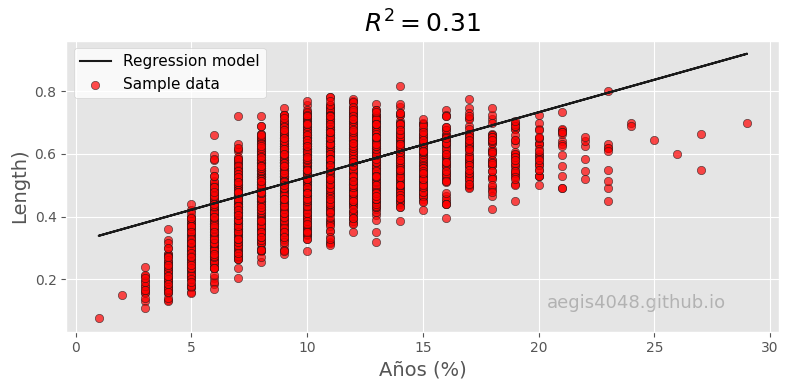

In [179]:
# Plot
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='red', alpha=0.7, label='Sample data')
ax.set_ylabel('Length)', fontsize=14)
ax.set_xlabel('Años (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [182]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generar datos de ejemplo
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.randn(100) * 2
response = 2.5 * X.squeeze() + np.mean(y - 2.5 * X.squeeze())

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Crear gráfico con Plotly
fig = go.Figure()

# Añadir línea de regresión
fig.add_trace(go.Scatter(
    x=X.squeeze(),
    y=response,
    mode='lines',
    name='Modelo de regresión',
    line=dict(color='black')
))

# Añadir datos de muestra
fig.add_trace(go.Scatter(
    x=X.squeeze(),
    y=y,
    mode='markers',
    name='Datos de muestra',
    marker=dict(color='red', size=8, line=dict(color='black', width=1))
))

# Ajustar el diseño
fig.update_layout(
    title=f'Regresión Lineal<br> $R^2= {model.score(X_test, y_test):.2f}$',
    xaxis_title='Años (%)',
    yaxis_title='Length',
    font=dict(size=14),
    annotations=[
        dict(
            x=0.8,
            y=0.1,
            xref='paper',
            yref='paper',
            text='aegis4048.github.io',
            showarrow=False,
            font=dict(size=13, color='grey'),
            align='center'
        )
    ]
)

# Mostrar el gráfico
fig.show()


utilizamos la regresión lineal simple que me da una precisión de predicción del 63% por lo que este modelo no es muy viable

También utilizamos la regresión lineal múltiple que, al analizar todas las variables de nuestro conjunto de datos, nos permite ver cómo interactúa la edad del abalón con una determinada variable como el peso y etc, pero al hacer el análisis tampoco es muy exacto.

Utilizando el método de descripción simple y al entrenar nuestra máquina para determinar el comportamiento, vemos que al envejecer el abulón, su peso y tamaño es mucho mayor, lo que nos permitirá tener una mejor ganancia al vender el abulón de acuerdo a su mayor peso, pero aun así nuestro modelo mejor mucho ya que tiene  0.95 de exactitud

# aprendizaje no supervisado agrupación

In [183]:
#first import data
df = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Abalon/abalone.csv', sep=',')
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


In [184]:
df = pd.get_dummies(df)

In [185]:
df.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15,False,False,True
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7,False,False,True
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9,True,False,False
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10,False,False,True
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7,False,True,False


In [187]:
# Supongamos que 'df' ya ha sido cargado previamente
df_abalone = df.copy()

# Convertir variables categóricas a variables dummy
df_abalone = pd.get_dummies(df_abalone, columns=['Sex_F','Sex_I','Sex_M'], drop_first=True)

# Verificar valores nulos y hacer imputación si es necesario
print("Valores nulos en cada columna:")
print(df_abalone.isnull().sum())

# Imputar valores nulos (si es necesario) - Ejemplo de imputación con la media
df_abalone.fillna(df_abalone.mean(), inplace=True)

# Verificar que los valores nulos han sido manejados
print("Valores nulos después de imputar:")
print(df_abalone.isnull().sum())

# Crear una nueva columna para 'Ages' si es necesario
df_abalone['Ages'] = df_abalone['Rings'] + 1.5

# Eliminar la columna 'Rings' si ya no es necesaria
if 'Rings' in df_abalone.columns:
    df_abalone.drop('Rings', axis=1, inplace=True)

# Verificar el DataFrame resultante
print("Primeras filas del DataFrame 'df_abalone':")
print(df_abalone.head())

print("Descripción del DataFrame:")
print(df_abalone.describe())

print("Información del DataFrame:")
print(df_abalone.info())


Valores nulos en cada columna:
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Sex_F_True        0
Sex_I_True        0
Sex_M_True        0
dtype: int64
Valores nulos después de imputar:
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Sex_F_True        0
Sex_I_True        0
Sex_M_True        0
dtype: int64
Primeras filas del DataFrame 'df_abalone':
   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0    0.46      0.36    0.10          0.51            0.22            0.10   
1    0.35      0.27    0.09          0.23            0.10            0.05   
2    0.53      0.42    0.14          0.68            0.26            0.14   
3    0.44      0.36    0.12          0.52            0.22            0.11   
4    0.33      0.26    0.08          0.20

In [201]:
features = ['Rings', 'Sex_F', 'Sex_I', 'Sex_M']
target = 'Length'  # Por ejemplo, si deseas predecir la longitud

In [202]:
from sklearn.manifold import TSNE

In [204]:
# Crear el objeto TSNE
tsne = TSNE(n_components=2, random_state=11)

In [207]:
#We transform the data to the specific number of dimensions and train the estimator
datoreducidos= tsne.fit_transform(df_abalone)

In [208]:
#this is the form of our data
datoreducidos.shape

(4177, 2)

In [209]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [211]:
print(datoreducidos.shape)  # Debería ser (n_samples, 2)
print(len(y))  # Debería ser igual al número de muestras en 'datoreducidos'


(4177, 2)
100


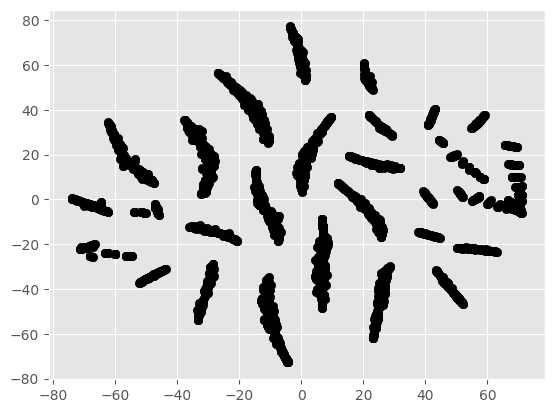

In [215]:
#We plot the reduced data where we only show the data that the model chose. It is the cluster that shows us the information of the abalone, we do it in black to see the information more clearly,
dots = plt.scatter(datoreducidos[:,0],datoreducidos[:,1],c='black')

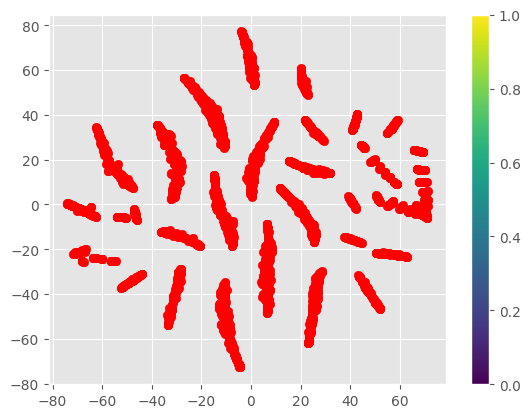

In [216]:
#
dots = plt.scatter(datoreducidos[:,0],datoreducidos[:,1],c='red',cmap=plt.cm.get_cmap('nipy_spectral_r',10))
colorbar = plt.colorbar(dots)

# aprendizaje no supervisado K-means cluster

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('ggplot')

In [218]:
df_abalone.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F_True,Sex_I_True,Sex_M_True,Ages
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,False,False,True,16.50
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,False,False,True,8.50
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,True,False,False,10.50
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,False,False,True,11.50
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,False,True,False,8.50


In [220]:
print(df_abalone.groupby('Ages').size())

Ages
2.50       1
3.50       1
4.50      15
5.50      57
6.50     115
7.50     259
8.50     391
9.50     568
10.50    689
11.50    634
12.50    487
13.50    267
14.50    203
15.50    126
16.50    103
17.50     67
18.50     58
19.50     42
20.50     32
21.50     26
22.50     14
23.50      6
24.50      9
25.50      2
26.50      1
27.50      1
28.50      2
30.50      1
dtype: int64


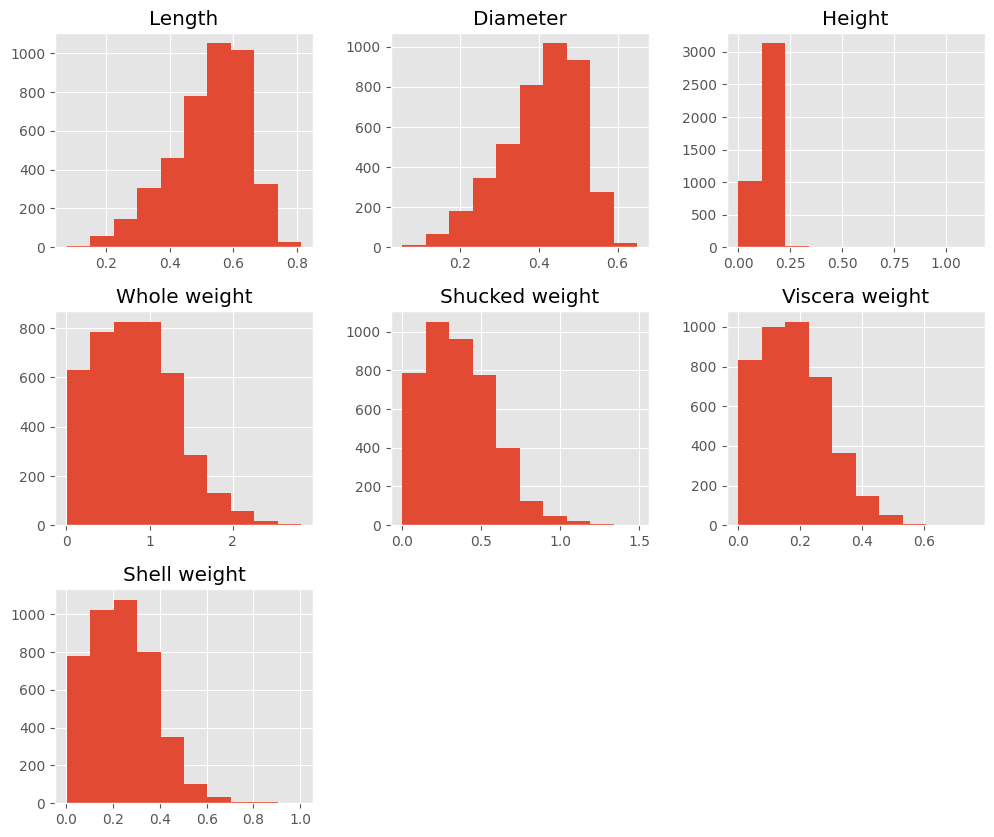

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df_abalone es tu DataFrame
# Eliminar la columna 'Ages'
df_abalone_no_ages = df_abalone.drop(['Ages'], axis=1)

# Crear histogramas de las columnas restantes
df_abalone_no_ages.hist(figsize=(12, 10))

# Mostrar los histogramas
plt.show()


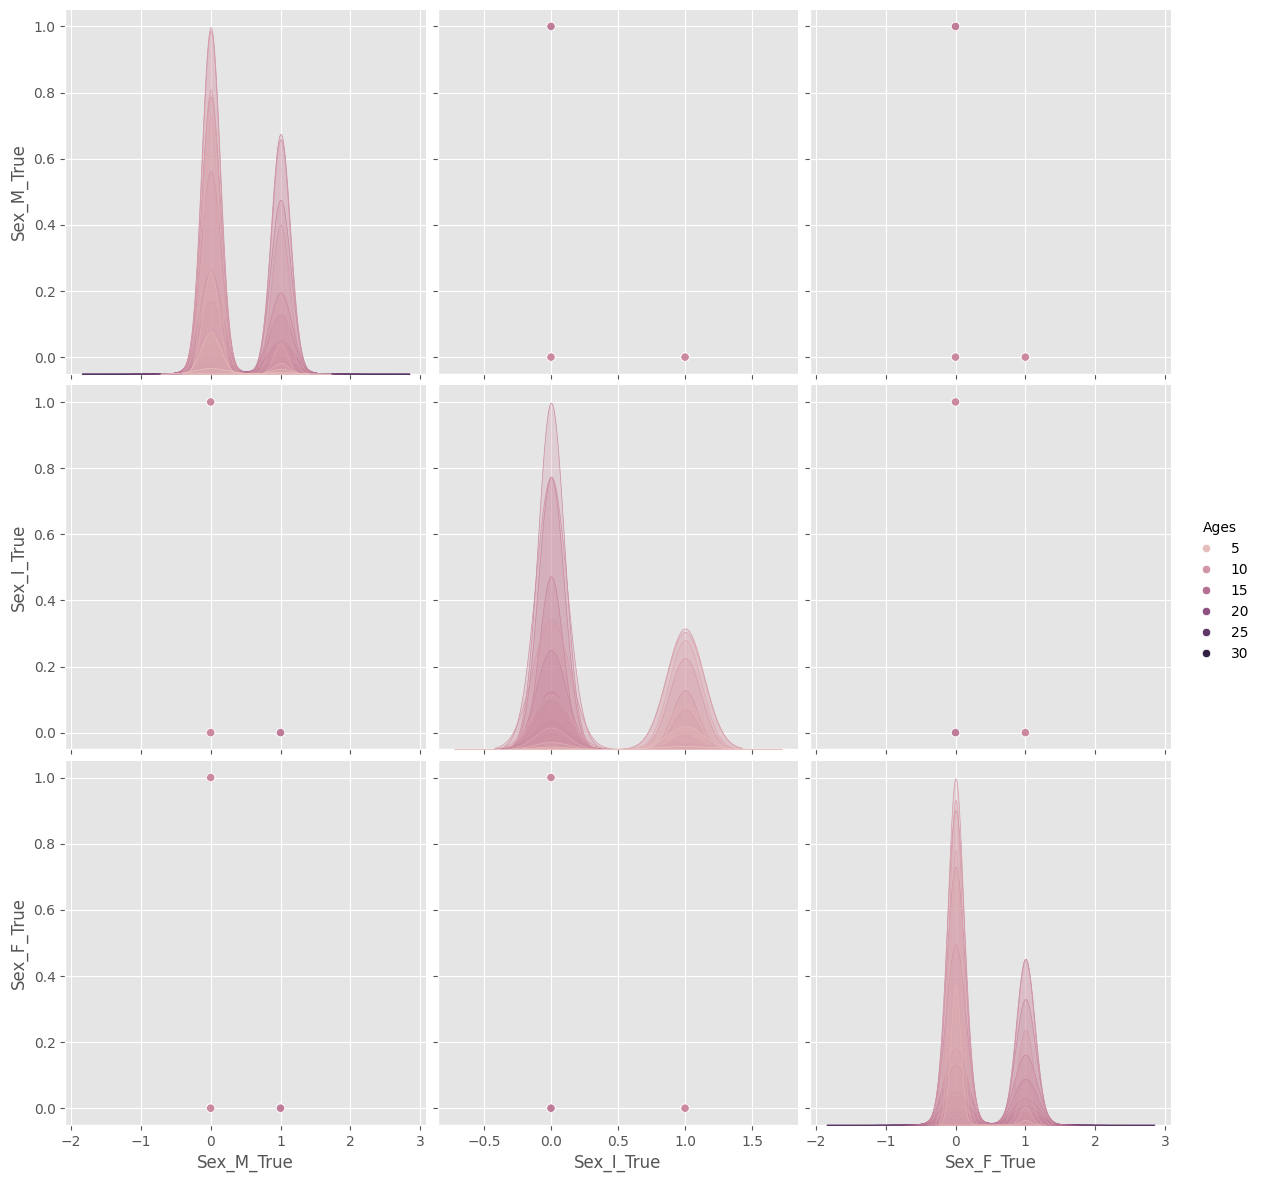

In [228]:
sb.pairplot(df_abalone.dropna(), hue='Ages',size=4,vars=["Sex_M_True","Sex_I_True","Sex_F_True"],kind='scatter')

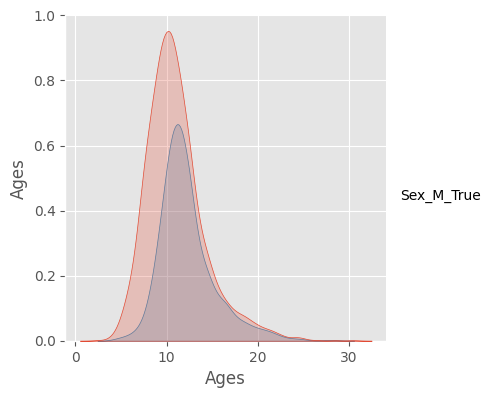

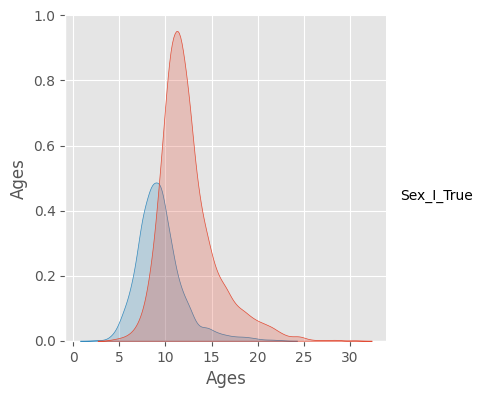

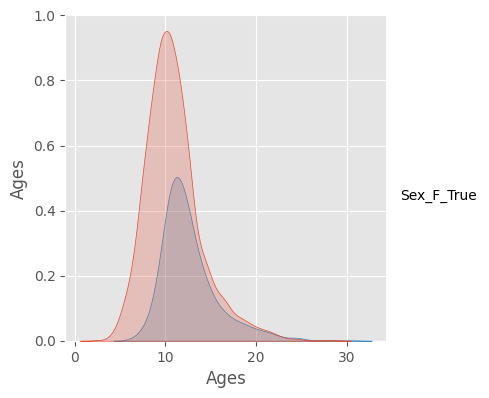

In [230]:
sb.pairplot(df_abalone.dropna(), hue='Sex_M_True',size=4,vars=["Ages"],kind='scatter')
sb.pairplot(df_abalone.dropna(), hue='Sex_I_True',size=4,vars=["Ages"],kind='scatter')
sb.pairplot(df_abalone.dropna(), hue='Sex_F_True',size=4,vars=["Ages"],kind='scatter')

In [231]:
#alimentamos el algoritmo
X = np.array(df_abalone[["Length","Diameter","Height"]])
y = np.array(df_abalone['Ages'])
X.shape

(4177, 3)

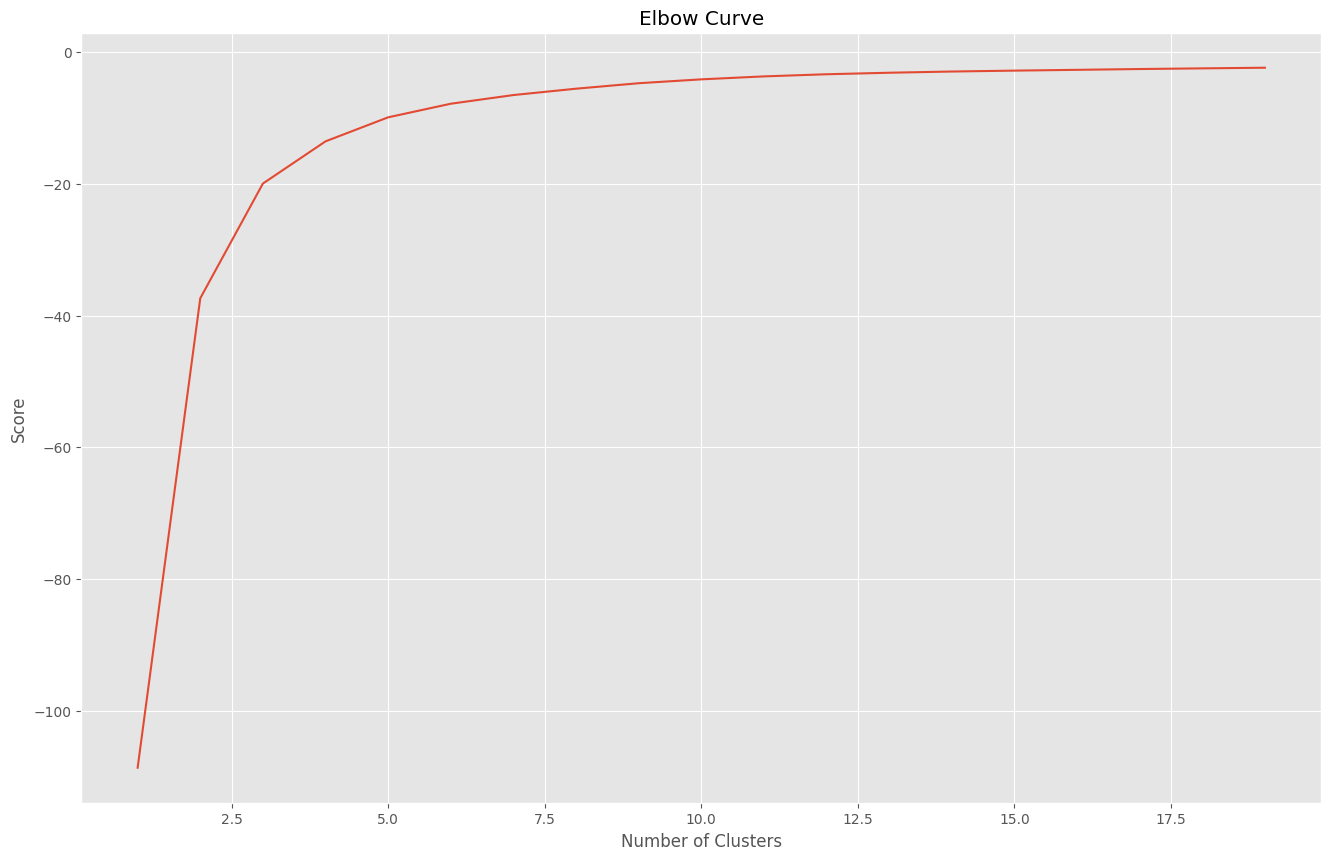

In [232]:
#Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K. Según vuestro criterio podría ser otro.

In [233]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.49451959 0.38313899 0.1301819 ]
 [0.26237705 0.19398361 0.06503279]
 [0.66754982 0.52697538 0.18454865]
 [0.58451487 0.45796557 0.15628326]
 [0.39183109 0.29751868 0.09898356]]


In [234]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

<Figure size 1600x1000 with 0 Axes>

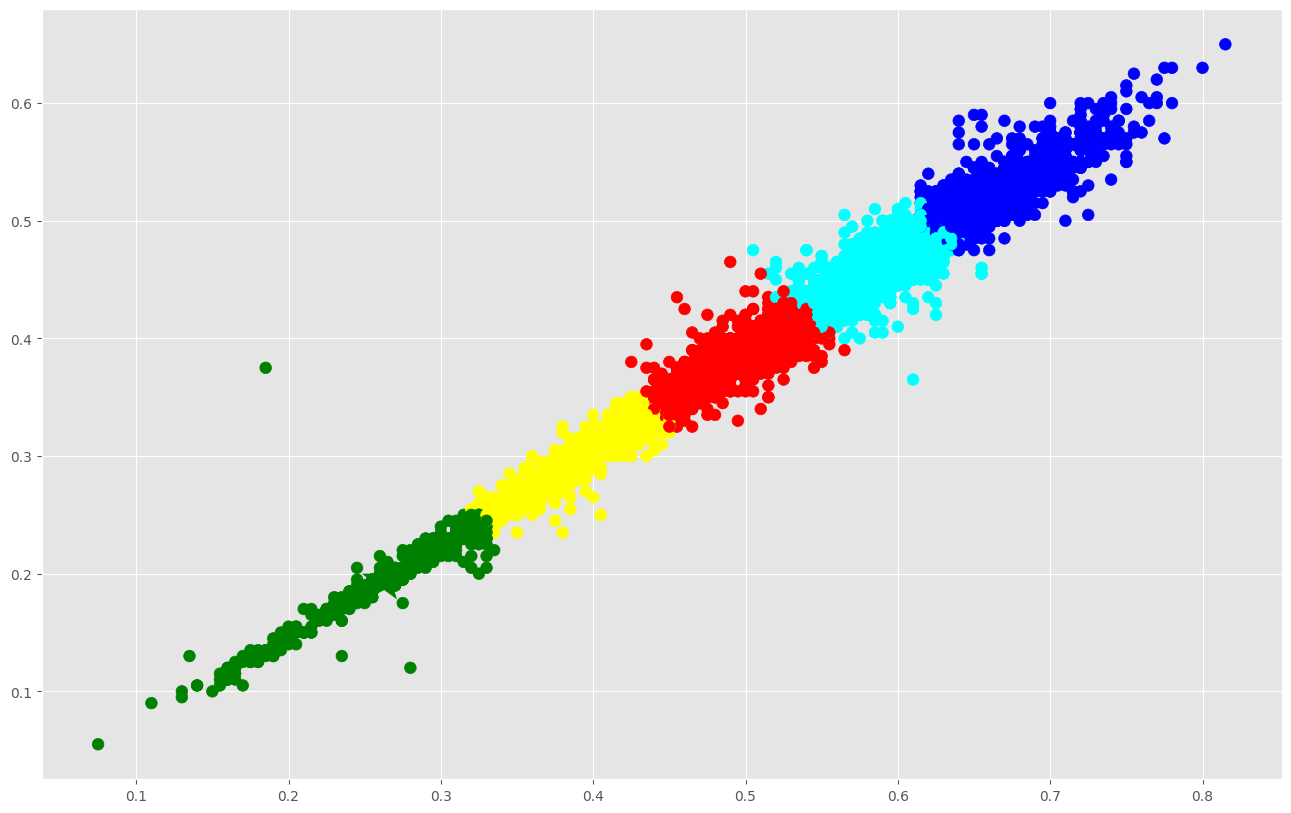

In [235]:
#Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.

# Getting the values and plotting it
f1 = df_abalone['Length'].values
f2 = df_abalone['Diameter'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

#Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

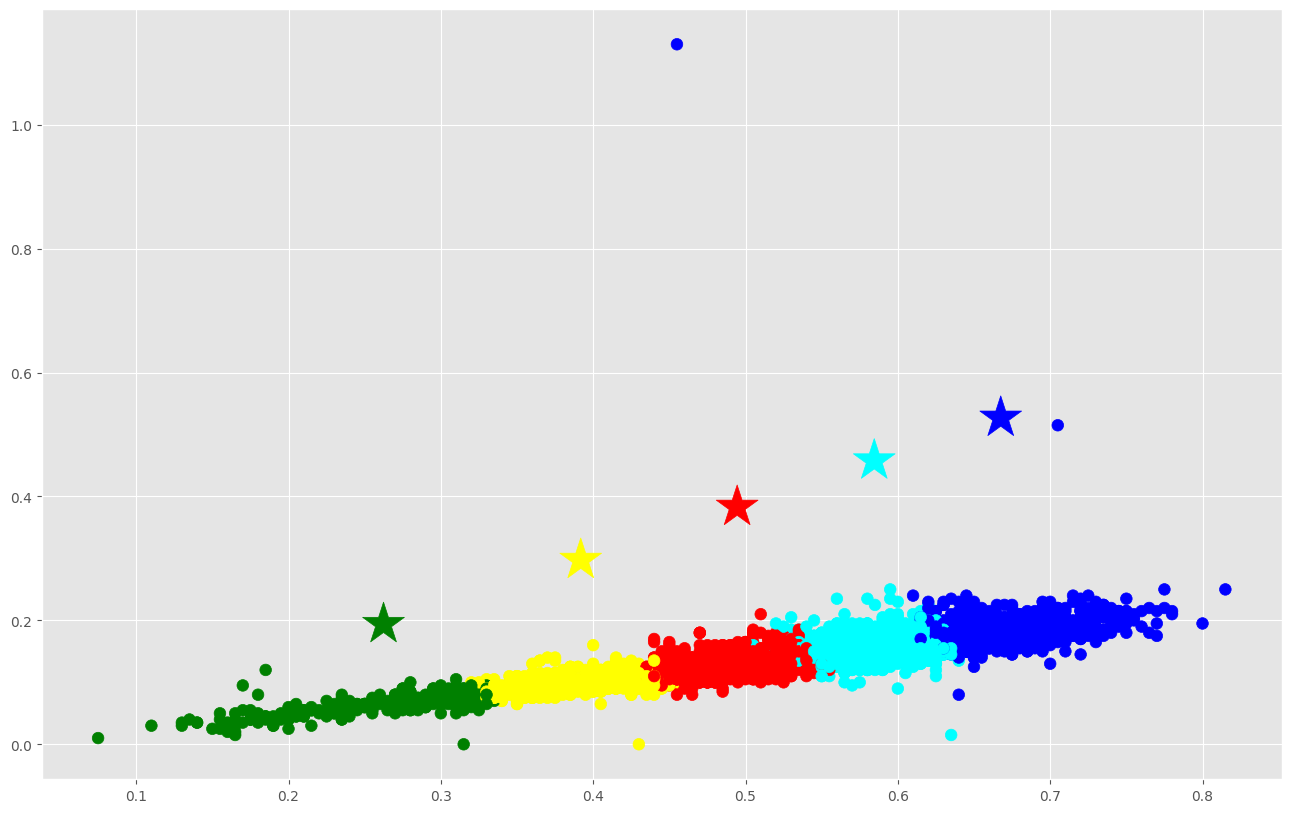

In [236]:
# Getting the values and plotting it
f1 = df_abalone['Length'].values
f2 = df_abalone['Height'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

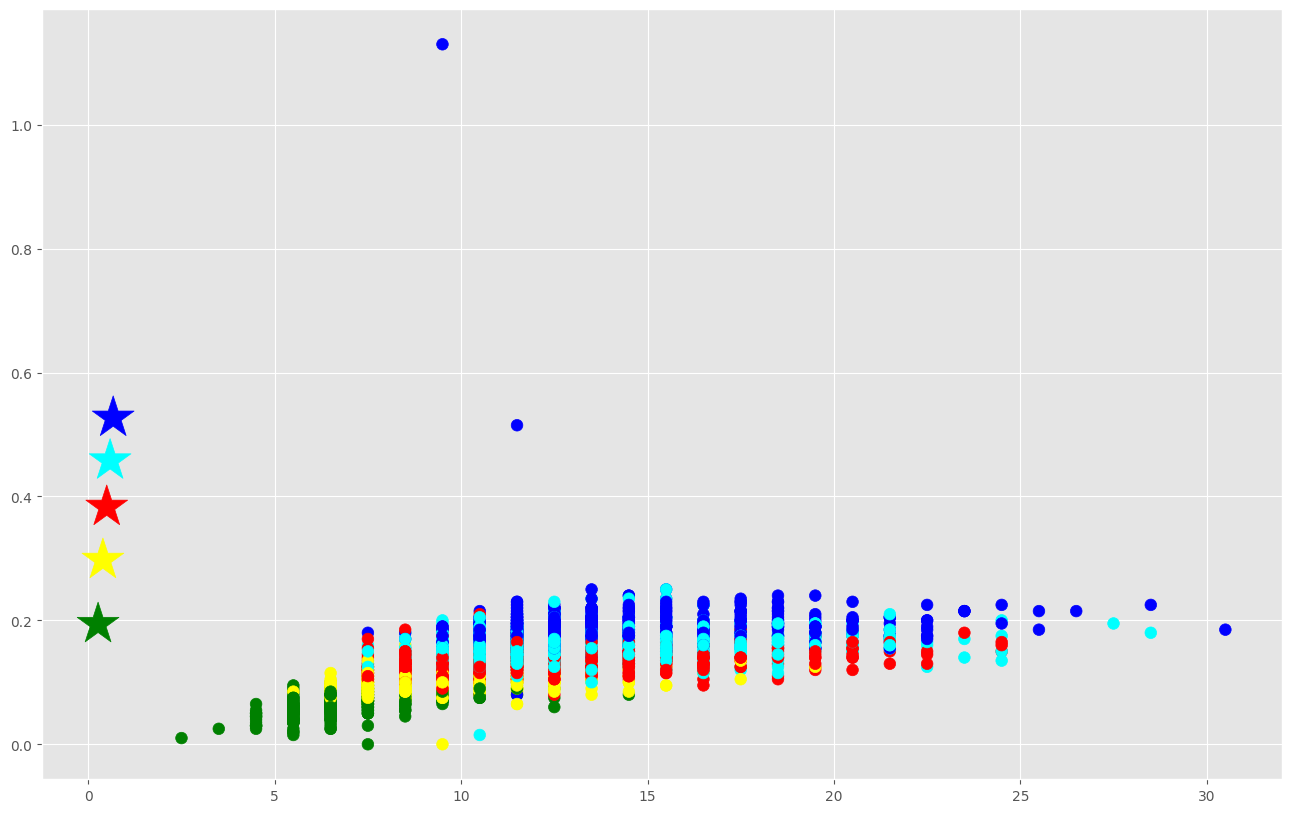

In [238]:
# Getting the values and plotting it
f1 = df_abalone['Ages'].values
f2 = df_abalone['Height'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [239]:
copy =  pd.DataFrame()
copy['Ages']=df_abalone['Ages'].values
copy['Ages']=df_abalone['Ages'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,1072
1,green,305
2,blue,854
3,cyan,1276
4,yellow,670
